## A* Implementation  on a maze


Original Manhattan Heuristic:
Path: [(4, 0), (3, 0), (2, 0), (2, 1), (2, 2), (2, 3), (1, 3), (0, 3), (0, 4)]
Cost: 8
Optimal = True


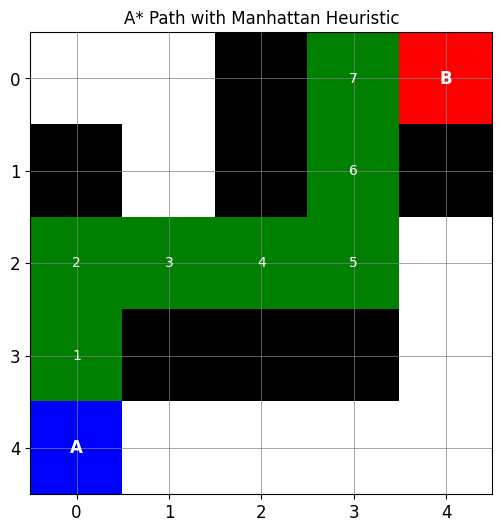


Case 1: Scaled Manhattan (1.5x):
Path: [(4, 0), (3, 0), (2, 0), (2, 1), (2, 2), (2, 3), (1, 3), (0, 3), (0, 4)]
Cost: 8
Optimal = True


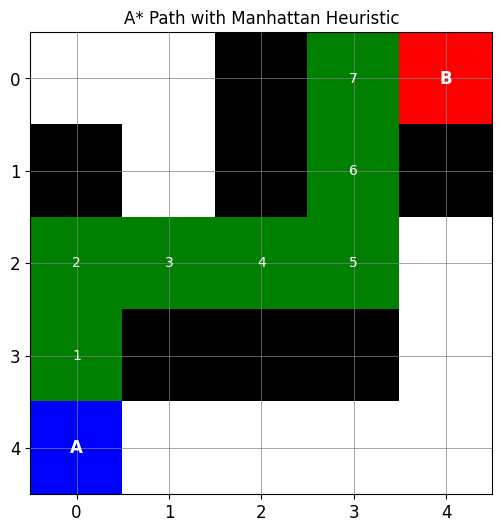


Case 2: Inconsistent Heuristic:
Path: [(4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (3, 4), (2, 4), (2, 3), (1, 3), (0, 3), (0, 4)]
Cost: 10
Optimal = False


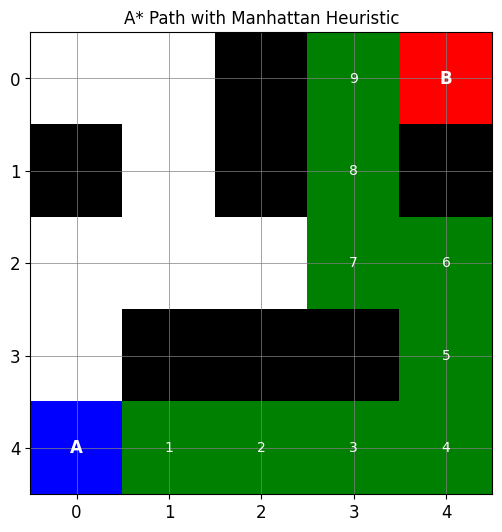

In [29]:
import heapq
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Maze grid
maze = [
    [0, 0, 1, 0, "B"],
    [1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    ["A", 0, 0, 0, 0]
]

def validate_maze(maze):
    if not maze or not maze[0]:
        raise ValueError("Maze cannot be empty")
    rows, cols = len(maze), len(maze[0])
    start, goal = None, None
    for i in range(rows):
        for j in range(cols):
            if maze[i][j] == "A":
                start = (i, j)
            if maze[i][j] == "B":
                goal = (i, j)
    if not start or not goal:
        raise ValueError("Start (A) or Goal (B) not found in maze")
    return start, goal, [[0 if cell in ["A", "B"] else cell for cell in row] for row in maze]

def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(grid, source, target, h_func):
    rows, cols = len(grid), len(grid[0])
    pq = [(0, source)]  
    parent = {}
    g_val = {source: 0}
    f_val = {source: h_func(source, target)}
    
    while pq:
        _, curr = heapq.heappop(pq)
        
        if curr == target:
            route = []
            while curr in parent:
                route.append(curr)
                curr = parent[curr]
            route.append(source)
            route.reverse()
            return route, g_val[target]
        
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            nb = (curr[0] + dx, curr[1] + dy)
            if 0 <= nb[0] < rows and 0 <= nb[1] < cols and grid[nb[0]][nb[1]] == 0:
                new_g = g_val[curr] + 1
                if new_g < g_val.get(nb, float('inf')):
                    parent[nb] = curr
                    g_val[nb] = new_g
                    f_val[nb] = new_g + h_func(nb, target)
                    heapq.heappush(pq, (f_val[nb], nb))
    
    return None, float('inf')

def visualize_maze(maze, path, start, goal):
    maze_vis = np.array(maze, dtype=float)
    if path:
        for (i, j) in path:
            maze_vis[i][j] = 2  
    maze_vis[start[0]][start[1]] = 3  
    maze_vis[goal[0]][goal[1]] = 4   
 
    colors = ['white', 'black', 'green', 'blue', 'red']
    cmap = ListedColormap(colors)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(maze_vis, cmap=cmap, interpolation='nearest')
    plt.title("A* Path with Manhattan Heuristic")
    plt.grid(True, which="both", color="gray", linewidth=0.5)
    plt.xticks(range(len(maze[0])), fontsize=12)
    plt.yticks(range(len(maze)), fontsize=12)
    # Annotate start and goal
    plt.text(start[1], start[0], 'A', ha='center', va='center', color='white', fontsize=12, weight='bold')
    plt.text(goal[1], goal[0], 'B', ha='center', va='center', color='white', fontsize=12, weight='bold')
    # Annotate path coordinates
    if path:
        for i, (x, y) in enumerate(path[1:-1], 1):  # Skip start and goal
            plt.text(y, x, str(i), ha='center', va='center', color='white', fontsize=10)
    plt.show()



try:
    
    start, goal, maze = validate_maze(maze)

    path, cost = astar(maze, start, goal, manhattan)
    print("\nOriginal Manhattan Heuristic:")
    print("Path:", path if path else "No path found")
    print("Cost:", cost)
    print("Optimal =", cost == len(path) - 1 if path else False)
    if path:
        visualize_maze(maze, path, start, goal)


    scaled_manhattan = lambda a, b: 1.5 * manhattan(a, b)
    path1, cost1 = astar(maze, start, goal, scaled_manhattan)
    print("\nCase 1: Scaled Manhattan (1.5x):")
    print("Path:", path1 if path1 else "No path found")
    print("Cost:", cost1)
    print("Optimal =", cost1 == len(path) - 1 if path1 else False)
    if path1:
        visualize_maze(maze, path1, start, goal)

    inconsistent_h = lambda a, b: manhattan(a, b) + 3 if a == (2, 2) else manhattan(a, b)
    path2, cost2 = astar(maze, start, goal, inconsistent_h)
    print("\nCase 2: Inconsistent Heuristic:")
    print("Path:", path2 if path2 else "No path found")
    print("Cost:", cost2)
    print("Optimal =", cost2 == len(path) - 1 if path2 else False)
    if path2:
        visualize_maze(maze, path2, start, goal)

except Exception as e:
    print(f"Error: {e}")
